### Championship RL 2023

Aims: Create the WPC for each team and create the PyExp for each team as well as look at the relationship between the two.

In [8]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 2.9 MB/s eta 0:00:0000:0100:01


In [6]:
# Include necessary packages

import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Create DATAFRAME for the data.
data_dir = "./data/"
CRL = pd.DataFrame()

for file in os.listdir(data_dir):
    CRL = CRL._append(pd.read_excel(f"{data_dir}{file}"))
    x = file.split("_")[1]
    season = x.replace(".xlsx", "")
    CRL["season"] = season

CRL = CRL.reset_index(drop=True)

# Create Totals for Values we care about
CRL["TotalGames"] = CRL["HomeG"] + CRL["AwayG"]
CRL["TotalWins"] = CRL["HomeW"] + CRL["AwayW"]
CRL["TotalLosses"] = CRL["HomeL"] + CRL["AwayL"]
CRL["TotalPoints"] = CRL["HomeP"] + CRL["AwayP"]
CRL["TotalPointsA"] = CRL["VisitorP"] + CRL["HomeP.1"]
CRL = CRL.replace("-", 0)
CRL["TotalDraws"] = CRL["HomeD"] + CRL["AwayD"]
CRL.head(10)

0     2023
1     2023
2     2023
3     2023
4     2023
5     2023
6     2023
7     2023
8     2023
9     2023
10    2023
11    2023
12    2023
13    2023
Name: season, dtype: object


In [16]:
# Now we can determine the WPC (Win Percentage for each team) We will do an overall WPC and a WPC for Home and Away

CRL["OverallWPC"] = CRL["TotalWins"] / CRL["TotalGames"]
CRL["HomeWPC"] = CRL["HomeW"] / CRL["HomeG"]
CRL["AwayWPC"] = CRL["AwayW"] / CRL["AwayG"]

CRL.head(10)

,Unnamed: 0,Team,HomeG,HomeW,HomeL,HomeD,HomeP,VisitorP,AwayG,AwayW,...,TotalGames,TotalWins,TotalLosses,TotalPoints,TotalPointsA,TotalDraws,PyExp,OverallWPC,HomeWPC,AwayWPC
0,1,Featherstone,14,13,1,0,634,162,13,12,...,27,25,2,1079,295,0,0.930450,0.925926,0.928571,0.923077
1,2,Toulouse,13,12,1,0,560,141,14,7,...,27,19,8,832,385,0,0.823636,0.703704,0.923077,0.500000
2,3,Bradford,14,9,4,1,392,241,13,7,...,27,16,10,677,572,1,0.583477,0.592593,0.642857,0.538462
3,4,Sheffield,13,9,4,0,382,211,14,7,...,27,16,11,780,560,0,0.659870,0.592593,0.692308,0.500000
4,5,London,14,9,5,0,344,241,13,7,...,27,16,11,600,552,0,0.541594,0.592593,0.642857,0.538462
5,6,York,13,8,5,0,264,249,14,7,...,27,15,12,557,557,0,0.500000,0.555556,0.615385,0.500000
6,7,Batley,13,8,5,0,257,260,14,7,...,27,15,12,506,519,0,0.487319,0.555556,0.615385,0.500000
7,8,Halifax,14,10,4,0,403,236,13,4,...,27,14,12,690,572,1,0.592692,0.518519,0.714286,0.307692
8,9,Widnes,14,8,6,0,328,287,13,5,...,27,13,14,619,652,0,0.474054,0.481481,0.571429,0.384615
9,10,Swinton,13,5,8,0,182,370,14,4,...,27,9,18,426,739,0,0.249418,0.333333,0.384615,0.285714


In [17]:
# Now lets generate the PyExp for each team
CRL['PyExp'] = CRL['TotalPoints']**2/(CRL['TotalPoints']**2 + CRL['TotalPointsA']**2)

CRL.head(10)


,Unnamed: 0,Team,HomeG,HomeW,HomeL,HomeD,HomeP,VisitorP,AwayG,AwayW,...,TotalGames,TotalWins,TotalLosses,TotalPoints,TotalPointsA,TotalDraws,PyExp,OverallWPC,HomeWPC,AwayWPC
0,1,Featherstone,14,13,1,0,634,162,13,12,...,27,25,2,1079,295,0,0.930450,0.925926,0.928571,0.923077
1,2,Toulouse,13,12,1,0,560,141,14,7,...,27,19,8,832,385,0,0.823636,0.703704,0.923077,0.500000
2,3,Bradford,14,9,4,1,392,241,13,7,...,27,16,10,677,572,1,0.583477,0.592593,0.642857,0.538462
3,4,Sheffield,13,9,4,0,382,211,14,7,...,27,16,11,780,560,0,0.659870,0.592593,0.692308,0.500000
4,5,London,14,9,5,0,344,241,13,7,...,27,16,11,600,552,0,0.541594,0.592593,0.642857,0.538462
5,6,York,13,8,5,0,264,249,14,7,...,27,15,12,557,557,0,0.500000,0.555556,0.615385,0.500000
6,7,Batley,13,8,5,0,257,260,14,7,...,27,15,12,506,519,0,0.487319,0.555556,0.615385,0.500000
7,8,Halifax,14,10,4,0,403,236,13,4,...,27,14,12,690,572,1,0.592692,0.518519,0.714286,0.307692
8,9,Widnes,14,8,6,0,328,287,13,5,...,27,13,14,619,652,0,0.474054,0.481481,0.571429,0.384615
9,10,Swinton,13,5,8,0,182,370,14,4,...,27,9,18,426,739,0,0.249418,0.333333,0.384615,0.285714


In [20]:
# Create subset DF of what we want

CRL23 = CRL[['Team', 'TotalGames', 'PyExp', 'OverallWPC', 'HomeWPC', 'AwayWPC', 'TotalPoints', 'TotalPointsA', "TotalWins"]]

CRL23


,Team,TotalGames,PyExp,OverallWPC,HomeWPC,AwayWPC,TotalPoints,TotalPointsA,TotalWins
0,Featherstone,27,0.930450,0.925926,0.928571,0.923077,1079,295,25
1,Toulouse,27,0.823636,0.703704,0.923077,0.500000,832,385,19
2,Bradford,27,0.583477,0.592593,0.642857,0.538462,677,572,16
3,Sheffield,27,0.659870,0.592593,0.692308,0.500000,780,560,16
4,London,27,0.541594,0.592593,0.642857,0.538462,600,552,16
5,York,27,0.500000,0.555556,0.615385,0.500000,557,557,15
6,Batley,27,0.487319,0.555556,0.615385,0.500000,506,519,15
7,Halifax,27,0.592692,0.518519,0.714286,0.307692,690,572,14
8,Widnes,27,0.474054,0.481481,0.571429,0.384615,619,652,13
9,Swinton,27,0.249418,0.333333,0.384615,0.285714,426,739,9


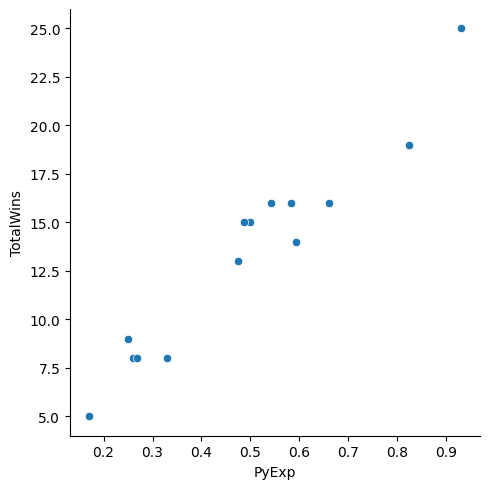

In [21]:
sns.relplot(x='PyExp', y='TotalWins', data=CRL23)

In [22]:
pyth_lm = smf.ols(formula= 'OverallWPC ~ PyExp', data=CRL23).fit()
pyth_lm.summary()

/usr/local/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             OverallWPC   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     177.3
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           1.51e-08
Time:                        10:39:31   Log-Likelihood:                 22.678
No. Observations:                  14   AIC:                            -41.36
Df Residuals:                      12   BIC:                            -40.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0737      0.035      2.136      0.054      -0.001       0.149
PyExp          0.8579      0.064     13.314      0.000       0.718       0.998
==============================================================================
Omnibus:                        3.689   Durbin-Watson:                   2.446
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                1.239
Skew:                          -0.158   Prob(JB):                        0.538
Kurtosis:                       1.577   Cond. No.                         5.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""